In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [1]:
!pip3 install flair

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/stocks/stocks_top_users_features.csv", sep=";")
#df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
#df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity
980,zakus5599,11,To everyone who is holding BEP - Brookfield Re...,[removed] BEP - Brookfield Renewable Partners ...,2021-03-04 2021-02-24 2021-02-23 2021-02-12 20...,4 24 23 12 24 14 13 13 13 26 19,3 2 2 2 1 1 1 1 1 9 8,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Advice Use the stickied threads Advice Advice...,15.000000,165,7.181818,79,0.948182,10.43,"['', 'Advice', 'Use', 'the', 'stickied', 'thre...","{'': 6, 'Advice': 4, 'Use': 1, 'the': 1, 'stic...",0.000000,0.000000,0.115997,0.478963,"['To', 'everyone', 'who', 'is', 'holding', 'BE...","['[', 'removed', ']', 'BEP', '-', 'Brookfield'...",0.115997
981,zandarkyn21,22,TRCH. Thoughts? Trading Crypto using PayPal CZ...,[removed] [removed] How are these going to fai...,2021-02-12 2021-01-12 2020-11-21 2020-11-19 20...,12 12 21 19 22 28 24 29 15 24 27 15 12 11 6 29...,2 1 11 11 10 9 9 8 8 7 6 6 5 5 5 4 4 4 4 4 4 4,2021 2021 2020 2020 2020 2020 2020 2020 2020 2...,NaN,{},,13.954545,307,1.363636,30,0.670455,14.75,"['', '', '', '', '', '', '', '', '', '', '', '...",{'': 22},-0.023810,0.404762,0.078327,0.411112,"['TRCH', '.', 'Thoughts', '?', 'Trading', 'Cry...","['[', 'removed', ']', '[', 'removed', ']', 'Ho...",0.054517
982,zanoo911,17,Is there any redundancy here? What is Day Trad...,I've spent quite a bit of time organizing this...,2021-07-29 2021-07-20 2021-07-19 2021-07-16 20...,29 20 19 16 15 12 11 30 26 25 24 21 8 7 5 4 3,7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Advice Request Advice Request Advice Request A...,20.117647,342,1.000000,17,1.000000,17.00,"['Advice', 'Request', 'Advice', 'Request', 'Ad...","{'Advice': 13, 'Request': 13, 'ETFs': 4}",0.439394,0.396591,0.076681,0.504028,"['Is', 'there', 'any', 'redundancy', 'here', '...","['I', ""'ve"", 'spent', 'quite', 'a', 'bit', 'of...",0.516075
983,zdonowitz,17,Any reason not to go 100% VTI??? 🚨🚨🚨🚨🚨ATTENTIO...,I've been investing into my Roth IRA for a few...,2021-02-03 2021-01-31 2021-01-31 2021-01-26 20...,3 31 31 26 23 13 10 9 7 6 6 5 2 31 31 29 23,2 1 1 1 1 1 1 1 1 1 1 1 1 12 12 12 3,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,['ZM'],{'ZM': 1},,9.235294,157,1.294118,22,0.934118,15.88,"['', '', '', '', '', '', '', '', '', '', '', '...",{'': 17},0.278125,0.372917,0.064477,0.433008,"['Any', 'reason', 'not', 'to', 'go', '100', '%...","['I', ""'ve"", 'been', 'investing', 'into', 'my'...",0.342602
984,zeroskater45,16,Beyond Meat Cash Flow Issue? What is your favo...,"Hi,\n\nI noticed beyond meat has been a fairly...",2020-12-28 2020-12-04 2020-12-01 2020-09-03 20...,28 4 1 3 10 9 8 1 28 20 20 29 18 27 26 25,12 12 12 9 7 5 5 5 4 4 4 3 3 2 2 2,2020 2020 2020 2020 2020 2020 2020 2020 2020 2...,NaN,{},Ticker Discussion Discussion Question Discussi...,7.812500,125,1.000000,16,0.500000,8.00,"['Ticker', 'Discussion', 'Discussion', 'Questi...","{'Ticker': 2, 'Discussion': 5, 'Question': 1, ...",0.336443,0.457257,0.234165,0.509774,"['Beyond', 'Meat', 'Cash', 'Flow', 'Issue', '?...","['Hi', ',', '\n\n', 'I', 'noticed', 'beyond', ...",0.570608


# Embedding of titles by user

In [5]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

In [6]:
from flair.data import Sentence
# create an example sentence
sentence = Sentence('TRCH. Thoughts? Trading Crypto using PayPal CZR MGM DKNG: Possible Corona Restrictions? Roblox IPO Keep 2 sell 1. CZR DKNG MGM MGM growth? Move position elsewhere? VBI Vaccines VBIV MGM or DKNG ERI/CZR Casino stocks Covid Rebound Portfolio Bloodbath Sell CCL buy ERI/DKNG $700 left of my start up bank roll. Question about ERI / CZR Buy / Sell Advice? Considering two stocks : RTX and QCOM PLAY 5G - FIVG / NXTG / or single stock: $1k 5G Learning as I go. Recommended resources? Opinions on SIX? (Six flags)')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

# now check out the embedded sentence.
print(sentence.embedding)

tensor([ 0.1151,  0.2233,  0.3273, -0.1930, -0.0703,  0.0027, -0.0358,  0.0480,
        -0.0508, -0.1049,  0.3527, -0.0137,  0.0281,  0.0796,  0.1648, -0.1623,
         0.0499,  0.0408, -0.1340,  0.2226,  0.1981,  0.0454, -0.0085,  0.2510,
         0.1021,  0.0542,  0.0468, -0.2530, -0.0858, -0.1045, -0.0700,  0.4076,
        -0.0913, -0.0128, -0.0049,  0.2243,  0.1404,  0.1534,  0.0099, -0.2144,
         0.0364, -0.3233, -0.1273, -0.2763, -0.1029, -0.0649, -0.1278, -0.2616,
        -0.0293, -0.5686,  0.0302,  0.0600, -0.0202,  0.6132, -0.2216, -1.5159,
         0.0160, -0.0069,  1.1101,  0.2594, -0.0713,  0.4384, -0.1632,  0.0340,
         0.4456,  0.0288,  0.2650,  0.2176,  0.2245, -0.0018, -0.0752, -0.1012,
        -0.1630, -0.2265, -0.0332, -0.0460, -0.1080,  0.0357, -0.5732, -0.1069,
         0.4224, -0.2150, -0.1915,  0.0783, -0.6913, -0.0181,  0.0283, -0.1007,
         0.0634, -0.0990, -0.0898,  0.0363,  0.0908, -0.1002, -0.4173,  0.0462,
         0.0275, -0.1849,  0.3912,  0.03

In [7]:
def get_sentence_emb(text):
  sentence = Sentence(text)
  document_embeddings.embed(sentence)
  return sentence.embedding


In [8]:
df.head(1)

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity
0,-0-itisaplane,13,thoughts on dropbox ? Thinking of making anoth...,"currently trading at 20.72 US.\n\nhigh, median...",2020-08-31 2020-08-29 2020-08-10 2020-08-05 20...,31 29 10 5 26 24 23 22 22 22 21 21 12,8 8 8 8 7 7 7 7 7 7 7 7 7,2020 2020 2020 2020 2020 2020 2020 2020 2020 2...,NaN,{},Discussion,25.538462,332,1.846154,24,0.897692,11.67,"['Discussion', '', '', '', '', '', '', '', '',...","{'Discussion': 1, '': 12}",0.066031,0.538518,0.104859,0.454719,"['thoughts', 'on', 'dropbox', '?', 'Thinking',...","['currently', 'trading', 'at', '20.72', 'US', ...",0.17089


In [9]:
df['title_emb'] = df['title'].apply(lambda x: get_sentence_emb(x))

In [10]:
df.head(2)

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
0,-0-itisaplane,13,thoughts on dropbox ? Thinking of making anoth...,"currently trading at 20.72 US.\n\nhigh, median...",2020-08-31 2020-08-29 2020-08-10 2020-08-05 20...,31 29 10 5 26 24 23 22 22 22 21 21 12,8 8 8 8 7 7 7 7 7 7 7 7 7,2020 2020 2020 2020 2020 2020 2020 2020 2020 2...,NaN,{},Discussion,25.538462,332,1.846154,24,0.897692,11.67,"['Discussion', '', '', '', '', '', '', '', '',...","{'Discussion': 1, '': 12}",0.066031,0.538518,0.104859,0.454719,"['thoughts', 'on', 'dropbox', '?', 'Thinking',...","['currently', 'trading', 'at', '20.72', 'US', ...",0.17089,"[tensor(-0.0510), tensor(0.2655), tensor(0.391..."
1,01Cloud01,27,Stock buyback monitoring website or tool $GT s...,I notice a lot or companies are issuing stock ...,2021-11-15 2021-10-29 2021-10-26 2021-09-06 20...,15 29 26 6 30 21 22 3 3 1 23 15 1 7 20 15 12 1...,11 10 10 9 8 8 1 1 1 1 12 11 9 8 6 6 4 4 4 3 3...,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,"['SMG', 'GT']","{'SMG': 1, 'GT': 1}",Resources Company Discussion Company Analysis ...,7.407407,200,1.851852,50,0.573704,15.49,"['Resources', 'Company', 'Discussion', 'Compan...","{'Resources': 1, 'Company': 2, 'Discussion': 4...",0.299495,0.248990,0.129085,0.406224,"['Stock', 'buyback', 'monitoring', 'website', ...","['I', 'notice', 'a', 'lot', 'or', 'companies',...",0.42858,"[tensor(0.0531), tensor(0.3390), tensor(0.2680..."


In [11]:
df['title_emb'][0].size()

torch.Size([100])

## Visualize Embeddings for clustering

In [12]:
all_users = []
all_users_emb = []
for index, row in df.iterrows():
     #print(row["author"], row["title_emb"])
     all_users.append(row["author"])
     all_users_emb.append(row["title_emb"].numpy())


In [13]:
from sklearn.manifold import TSNE
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


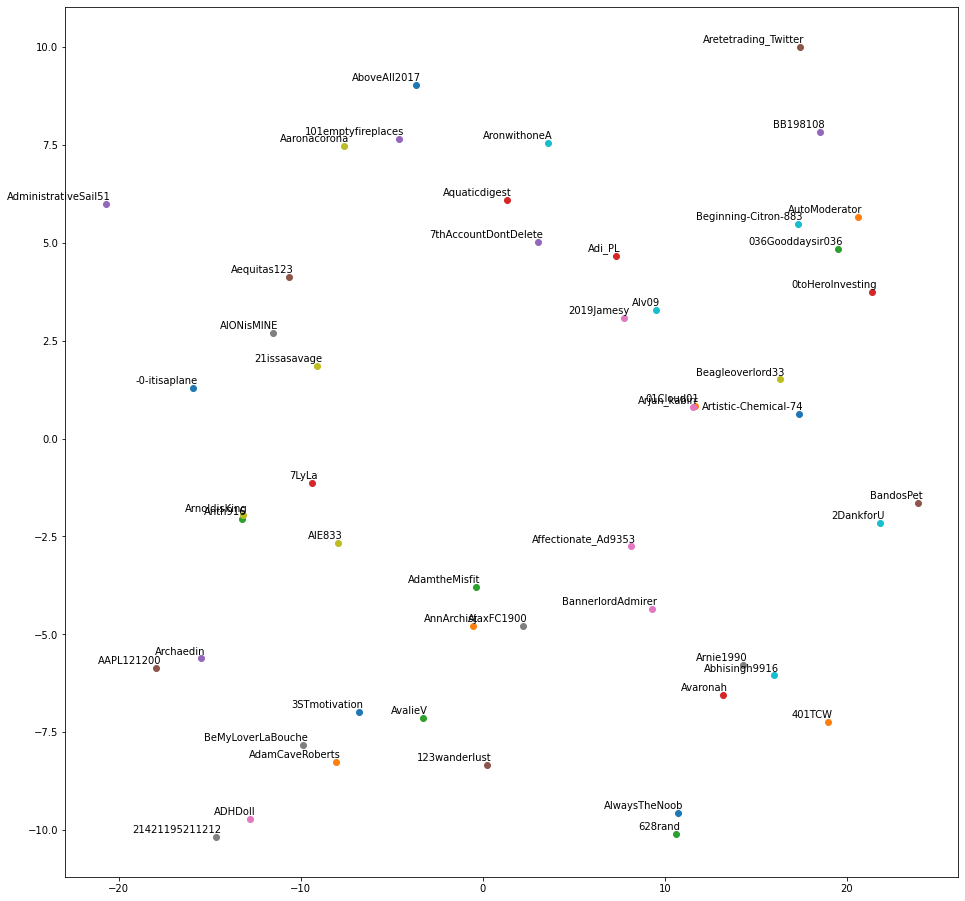

In [14]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(all_users_emb)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:50])):
    plt.scatter(x[i],y[i])
    plt.annotate(all_users[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

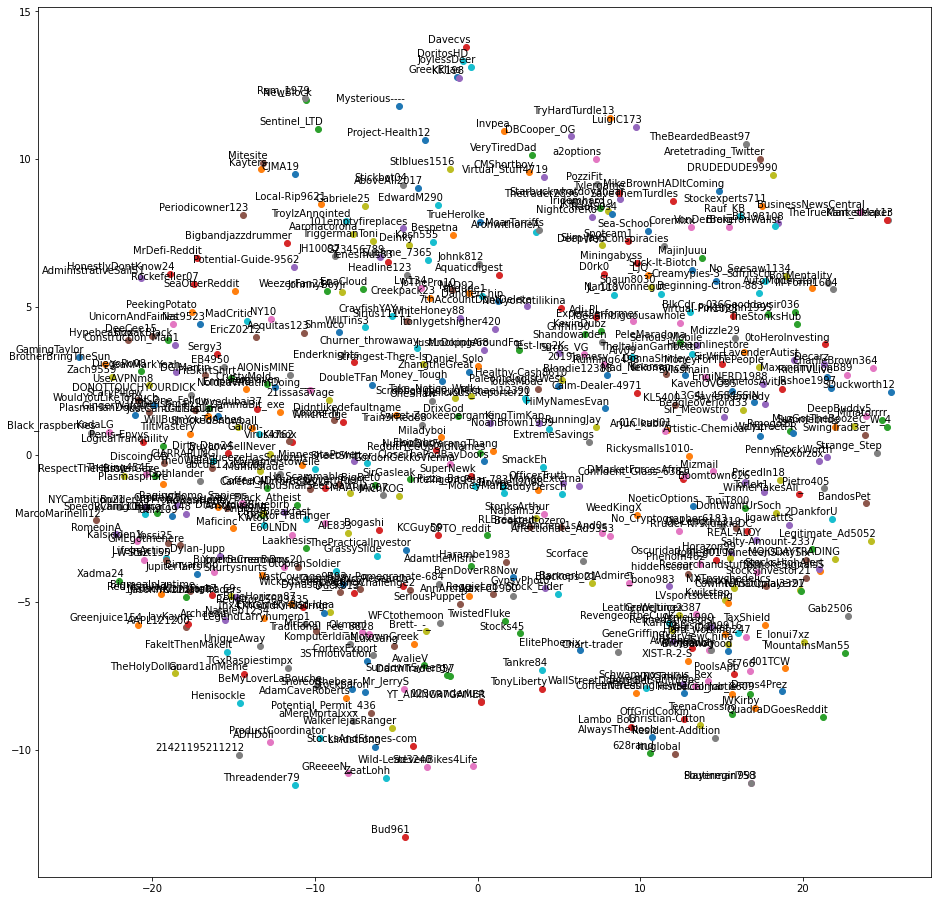

In [15]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:500])):
    plt.scatter(x[i],y[i])
    plt.annotate(all_users[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [16]:
## compare two users of same cluster 
user1 = 'Abhisingh9916'
user2 = 'Arnie1990'
df[df['author'] == user1]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
19,Abhisingh9916,16,Reddit to Raise $700 Million in Late-Stage Fun...,Social media community Reddit stated on Thursd...,2021-08-13 2021-08-12 2021-08-12 2021-08-12 20...,13 12 12 12 12 12 10 9 8 8 8 7 7 7 7 7,8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,['CMG'],{'CMG': 1},Company News Company Analysis Company Analysis...,148.625,2378,1.0,16,1.0,16.0,"['Company', 'News', 'Company', 'Analysis', 'Co...","{'Company': 8, 'News': 7, 'Analysis': 4, 'Trad...",0.131,0.469,0.065173,0.402963,"['Reddit', 'to', 'Raise', '$', '700', 'Million...","['Social', 'media', 'community', 'Reddit', 'st...",0.196173,"[tensor(0.1319), tensor(0.2100), tensor(0.2561..."


In [17]:
df[df['author'] == user2]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
37,Arnie1990,11,Is this the reason markets are crashing today?...,**Treasury Secretary Yellen says rates may hav...,2021-05-04 2021-05-04 2021-04-26 2021-04-23 20...,4 4 26 23 22 19 19 15 9 23 11,5 5 4 4 4 4 4 4 3 2 2,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Resources Company News Resources Resources Res...,59.272727,652,1.0,11,0.96,10.56,"['Resources', 'Company', 'News', 'Resources', ...","{'Resources': 5, 'Company': 5, 'News': 3, 'Ind...",0.088523,0.245909,0.086162,0.325266,"['Is', 'this', 'the', 'reason', 'markets', 'ar...","['*', '*', 'Treasury', 'Secretary', 'Yellen', ...",0.174684,"[tensor(0.0548), tensor(0.2254), tensor(0.3862..."


In [18]:
## compare two users of opposite clusters
user1 = 'Arnie1990'
user2 = 'AAPL121200'

In [19]:
df[df['author'] == user1]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
37,Arnie1990,11,Is this the reason markets are crashing today?...,**Treasury Secretary Yellen says rates may hav...,2021-05-04 2021-05-04 2021-04-26 2021-04-23 20...,4 4 26 23 22 19 19 15 9 23 11,5 5 4 4 4 4 4 4 3 2 2,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Resources Company News Resources Resources Res...,59.272727,652,1.0,11,0.96,10.56,"['Resources', 'Company', 'News', 'Resources', ...","{'Resources': 5, 'Company': 5, 'News': 3, 'Ind...",0.088523,0.245909,0.086162,0.325266,"['Is', 'this', 'the', 'reason', 'markets', 'ar...","['*', '*', 'Treasury', 'Secretary', 'Yellen', ...",0.174684,"[tensor(0.0548), tensor(0.2254), tensor(0.3862..."


In [20]:
df[df['author'] == user2]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
15,AAPL121200,11,AAPL posts all time earnings record and bleeds...,"[removed] After the big day on Friday, could w...",2021-01-29 2021-01-24 2021-01-08 2021-01-04 20...,29 24 8 4 28 20 20 20 20 12 1,1 1 1 1 12 12 12 12 12 12 12,2021 2021 2021 2021 2020 2020 2020 2020 2020 2...,NaN,{},Ticker Discussion Ticker Discussion Ticker Que...,12.636364,139,1.0,11,1.0,11.0,"['Ticker', 'Discussion', 'Ticker', 'Discussion...","{'Ticker': 4, 'Discussion': 6, 'Question': 4, ...",0.203626,0.319426,0.051973,0.474975,"['AAPL', 'posts', 'all', 'time', 'earnings', '...","['[', 'removed', ']', 'After', 'the', 'big', '...",0.255598,"[tensor(-0.0013), tensor(0.2113), tensor(0.439..."


In [21]:
len(x)

985

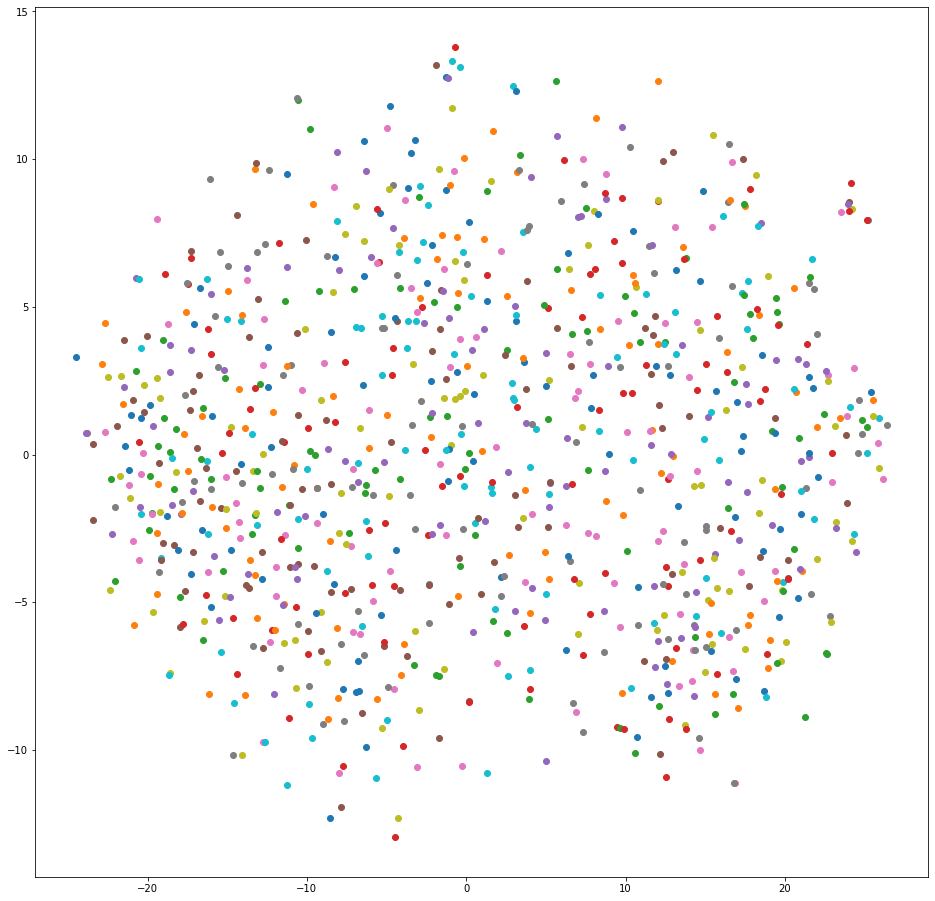

In [22]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate('',
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

## BERT Embeddings

In [23]:
from flair.embeddings import TransformerDocumentEmbeddings

# init embedding
embedding = TransformerDocumentEmbeddings('bert-base-uncased')

In [24]:
def get_stackedsentence_emb(text):
  sentence = Sentence(text)
  embedding.embed(sentence)
  return sentence.embedding


# now check out the embedded tokens.
#for token in sentence:
#    print(token)
#    print(token.embedding)

In [25]:
test = df.loc[:50,'title'].apply(lambda x: get_stackedsentence_emb(x))

In [ ]:
df['title_emb_BERT'] = df['title'].apply(lambda x: get_stackedsentence_emb(x))

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
def plot_embeddings(df_name,label_name,emb_col_name,total_points):

	all_users = []
	all_users_emb = []
	for index, row in df_name.iterrows():
		 #print(row["author"], row["title_emb"])
		 all_users.append(row[label_name])
		 all_users_emb.append(row[emb_col_name].numpy())
		 

	tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
	new_values = tsne_model.fit_transform(all_users_emb)

	x = []
	y = []
	for value in new_values:
		x.append(value[0])
		y.append(value[1])
			
	plt.figure(figsize=(16, 16)) 
	for i in range(len(x[0:total_points])):
		plt.scatter(x[i],y[i])
		plt.annotate(all_users[i],
						 xy=(x[i], y[i]),
						 xytext=(5, 2),
						 textcoords='offset points',
						 ha='right',
						 va='bottom')
	plt.show()

In [ ]:
plot_embeddings(df,"author","title_emb_stacked",100)

In [ ]:
plot_embeddings(df[df['score'] > 250],"author","title_emb_stacked",len(df[df['score'] > 250]))